<a href="https://colab.research.google.com/github/hrishikreddy/CNLAB/blob/main/MLInt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1.  Demonstration of decision tree algorithm.
2.  Demonstration of SVM,
3.  Demonstration of KNN
4.  Demonstration of Naïve Bayesian classifier
5.  Demonstration of Ensemble techniques like
I.  random forest,
II. bagging,
III.    boosting  (AdaBoost) and
        Compare their performance with different decision trees.
6.  Demonstration of clustering algorithms to classify for the standard datasets.
I.  k-Means,
II. Agglomerative
III.    and DBSCAN

'''

In [2]:
#1 Decision Tree Classifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the data
X = data.iloc[:,1:-1]  # Features
y = data.iloc[:,-1]  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predict for a new instance
new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
new_prediction = tree.predict(new_instance)

# Display the prediction result
print("\nPrediction for the new instance:", new_prediction[0])

Decision Tree Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Prediction for the new instance: Iris-setosa


In [ ]:
#1 Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('spambase.csv')  # Load your dataset
predictors = df.iloc[:, 0:57]  # Select predictor features
target = df.iloc[:, -1]  # Select the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Decision Tree Accuracy: 0.9148566463944396
Confusion Matrix:
 [[623  53]
 [ 45 430]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("defaulter.csv").fillna(df.mean(numeric_only=True))

# Feature scaling
df[['balance', 'income']] = StandardScaler().fit_transform(df[['balance', 'income']])

# Define features and target variable
X = df[['balance', 'income']]
y = df['defaulter']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
#2 SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features (X) and target (y)
X = data.iloc[:, 1:-1]  # Skip the first column (ID), use feature columns
y = data.iloc[:, -1]    # The last column (target/species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print("SVM Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Predict for a new instance
new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
new_prediction = svm.predict(new_instance)

# Display the prediction result
print("\nPrediction for the new instance:", new_prediction[0])


SVM Classifier Accuracy: 1.0

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Prediction for the new instance: Iris-setosa


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features (X) and target (y)
X = data.iloc[:, [0, 1]].values  # Using only the first two features for simplicity
y = data.iloc[:, -1].values      # The target column (Species)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------- Simple Scatter Plot --------------------
# Plot the test data points
# plt.figure(figsize=(8, 6))
# for species in set(y):
#     species_mask = y_test == species
#     plt.scatter(X_test[species_mask, 0], X_test[species_mask, 1], label=species)

# plt.xlabel("Sepal Length")
# plt.ylabel("Sepal Width")
# plt.title("SVM Classification Results (Test Data)")
# plt.legend()
# plt.show()

# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

# # Add labels and title
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('SVM Predictions')

# import matplotlib.pyplot as plt

# Basic scatter plot using predicted labels for coloring
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Classification Results')

# Display the plot
plt.colorbar(label='Predicted Class')
plt.show()



In [ ]:
#3 KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features (X) and target (y)
X = data.iloc[:, 1:-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can change n_neighbors to any number

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
new_prediction = knn.predict(new_instance)

# Display the prediction result
print("\nPrediction for the new instance:", new_prediction[0])

KNN Classifier Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Prediction for the new instance: Iris-setosa


In [ ]:
#4 Naive Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features (X) and target (y)
X = data.iloc[:,1 :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier (GaussianNB for continuous features)
nb = GaussianNB()

# Train the Naive Bayes classifier
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Classifier Accuracy: {accuracy_nb:.2f}")

# Display the classification report and confusion matrix
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
new_prediction = nb.predict(new_instance)

# Display the prediction result
print("\nPrediction for the new instance:", new_prediction[0])


Naive Bayes Classifier Accuracy: 0.98

Naive Bayes Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

Naive Bayes Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Prediction for the new instance: Iris-setosa


In [ ]:
#5 Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('spambase.csv')
predictors = df.iloc[:, 0:57]  # Features
target = df.iloc[:, -1]       # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

# Create a RandomForestClassifier with desired hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))



Accuracy: 0.944967414916727
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       804
           1       0.96      0.91      0.93       577

    accuracy                           0.94      1381
   macro avg       0.95      0.94      0.94      1381
weighted avg       0.95      0.94      0.94      1381



In [ ]:
#6 Bagging

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Iris.csv")

# Prepare the features (X) and target (y)
X = data.iloc[:, 1:-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Bagging Classifier with the default base estimator (Decision Tree)
bagging = BaggingClassifier(n_estimators=20, random_state=42)

# Train the Bagging Classifier on the training data
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

new_instance = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
new_prediction = bagging.predict(new_instance)

# Display the prediction result
print("\nPrediction for the new instance:", new_prediction[0])



Bagging Classifier Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Prediction for the new instance: Iris-setosa


In [ ]:
#7 Adaboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
#from sklearn.tree import DecisionTreeClassifier  # If you want to specify a base estimator

# Load your dataset (replace 'your_dataset.csv' with the actual file)
df = pd.read_csv('spambase.csv')
predictors = df.iloc[:, 0:57]   # Features
target = df.iloc[:, -1]        # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

# Create an AdaBoostClassifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
# You can optionally specify a base_estimator, e.g.,
# ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# Train the model
ada_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9333816075307748
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       804
           1       0.93      0.90      0.92       577

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Read the dataset
data = pd.read_csv('Mall_customers.csv')

# Selecting features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- K-Means Clustering -------------------
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Labels'] = kmeans_labels

# ------------------- Agglomerative Clustering -------------------
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
data['Agglo_Labels'] = agglo_labels

# ------------------- DBSCAN Clustering -------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Labels'] = dbscan_labels

# Display the first few rows of the dataframe with labels
print(data.head())

# Optionally, save the results to a new CSV file
data.to_csv('mall_customers_clustered.csv', index=False)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Labels  Agglo_Labels  DBSCAN_Labels  
0              3             4              0  
1              4             3              0  
2              3             4              0  
3              4             3              0  
4              3             4              0  


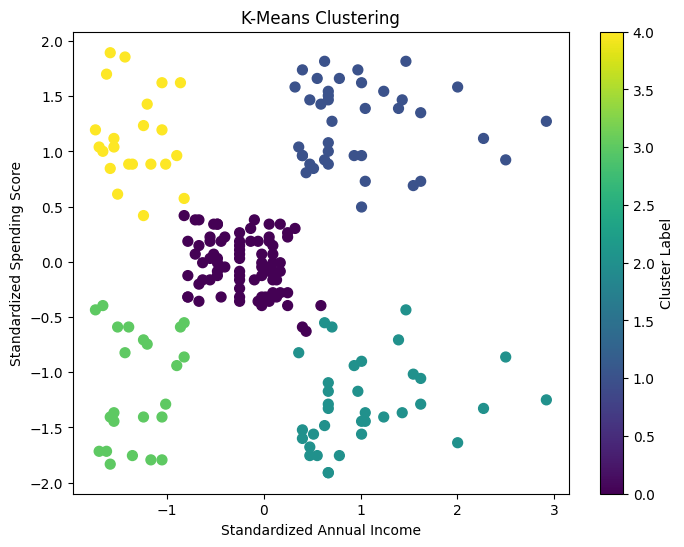

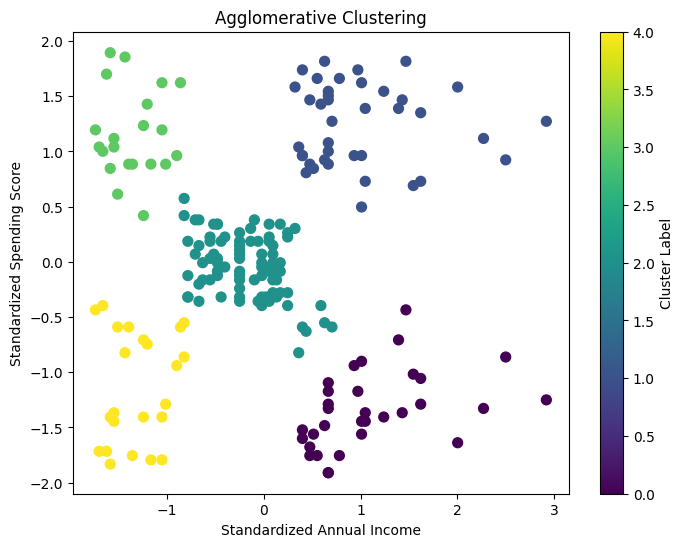

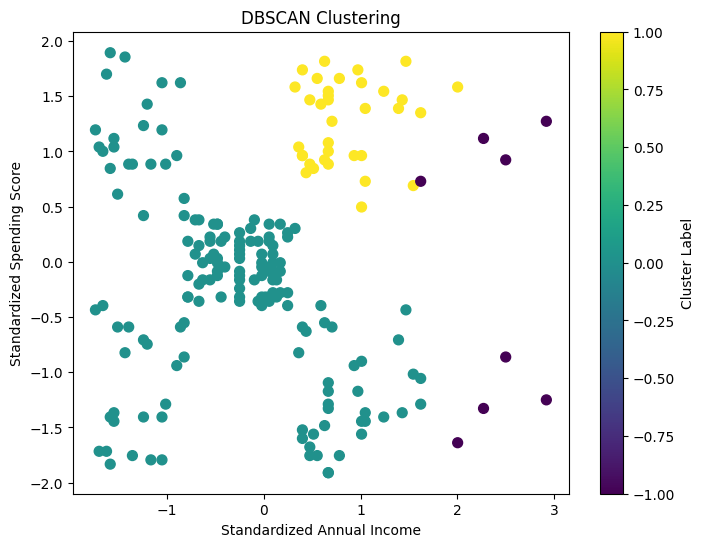

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Labels  Agglo_Labels  DBSCAN_Labels  
0              3             4              0  
1              4             3              0  
2              3             4              0  
3              4             3              0  
4              3             4              0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Read the dataset
data = pd.read_csv('Mall_customers.csv')

# Selecting features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- K-Means Clustering -------------------
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Labels'] = kmeans_labels

# Plot K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()

# ------------------- Agglomerative Clustering -------------------
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
data['Agglo_Labels'] = agglo_labels

# Plot Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()

# ------------------- DBSCAN Clustering -------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Labels'] = dbscan_labels

# Plot DBSCAN Clustering
plt.figure(figsize=(8, 6))
# Use different colors for noise points (-1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


# Display the first few rows of the dataframe with labels
print(data.head())

# Optionally, save the results to a new CSV file
data.to_csv('mall_customers_clustered.csv', index=False)

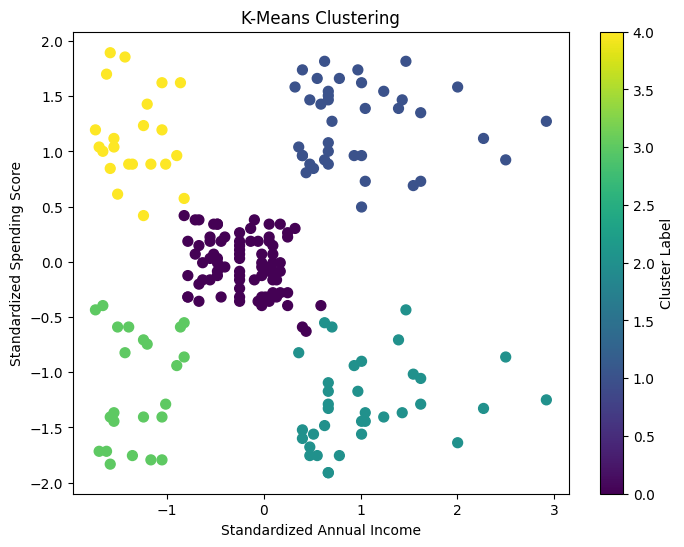

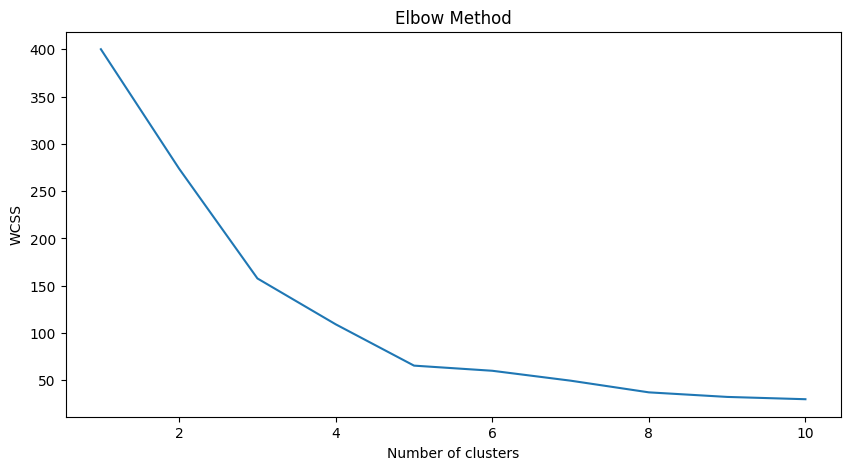

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Read the dataset
data = pd.read_csv('Mall_customers.csv')

# Selecting features: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------- K-Means Clustering -------------------
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
data['KMeans_Labels'] = kmeans_labels

# Plot K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()

# Find optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

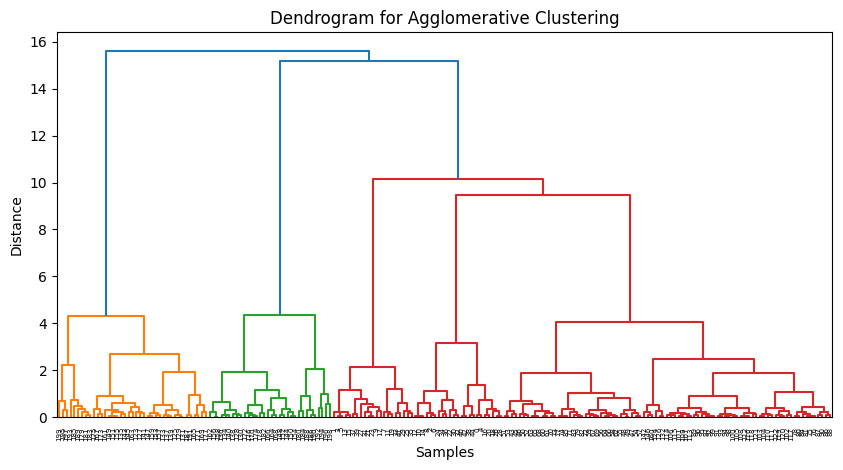

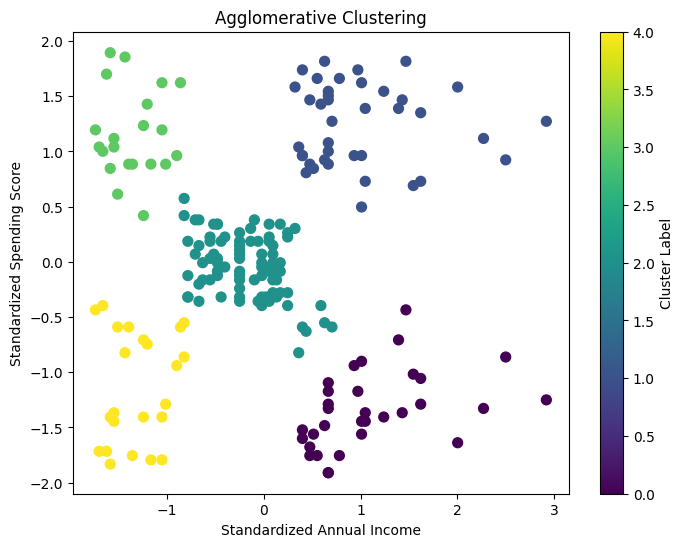

In [18]:
#9 Agglomerative

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('Mall_customers.csv')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
data['Agglo_Labels'] = agglo_labels

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.colorbar(label='Cluster Label')
plt.show()


<ipython-input-27-7b00ee749e6f>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("Spectral", len(unique_labels))


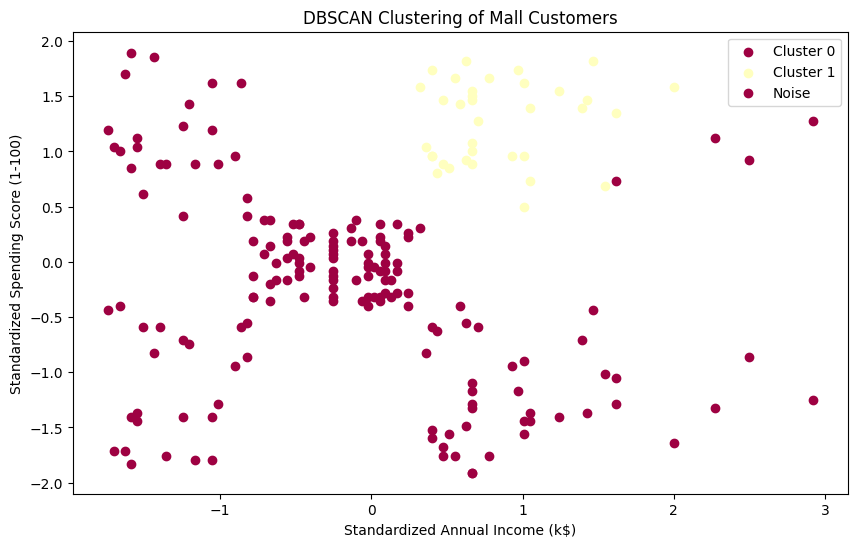

In [ ]:
#10 DBSCAN

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_customers.csv')

# Select relevant features (assumed columns in the dataset)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
labels = dbscan.fit_predict(X_scaled)

# Visualize the clustering result
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.get_cmap("Spectral", len(unique_labels))

for k in unique_labels:
    class_member_mask = (labels == k)
    plt.scatter(X_scaled[class_member_mask, 0], X_scaled[class_member_mask, 1],
                color=colors(k), label=f'Cluster {k}' if k != -1 else 'Noise')

plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Standardized Annual Income (k$)')
plt.ylabel('Standardized Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
#Correlation
import pandas as pd
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
correlation_matrix=x.corr()
correlation_matrix_target=correlation_matrix["SepalLengthCm"].drop("SepalLengthCm")
correlation_matrix_target[correlation_matrix_target>0.5].index.tolist()

['Id', 'PetalLengthCm', 'PetalWidthCm']

In [28]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
selector=VarianceThreshold(threshold=0.5)
x=selector.fit_transform(x)
x[:5]

array([[1. , 5.1, 1.4, 0.2],
       [2. , 4.9, 1.4, 0.2],
       [3. , 4.7, 1.3, 0.2],
       [4. , 4.6, 1.5, 0.2],
       [5. , 5. , 1.4, 0.2]])

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
# load dataset into Pandas DataFrame
dataframe = pd.read_csv(r"Qinspection.csv")
print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
display(dataframe)

#-----------------------------------------------------------------------------------
features = ['feature1', 'feature2', 'feature3', 'feature4','feature5','feature6']
# Separating out the features
X=dataframe.loc[:,features].values
# Separating out the target
label = dataframe.iloc[:,-1]

###################################################
# VARIANCE THRESHOLDING
###################################################
selector = VarianceThreshold(threshold=0.2)
# Perform variance thresholding
data=selector.fit_transform(X)

#reduced number of features
print('----------------------')
print(' FEATURE and its VARIANCE')
print('----------------------')
for feature in zip(features, selector.variances_):
    display(feature)

print('-------------------------------------------------------------------------')
print('FINAL FEATURES')
print('-------------------------------------------------------------------------')

# Print the results
print('Number of features before variance thresholding: {}'.format(X.shape))
print('Number of features after variance thresholding: {}'.format(data.shape))

#convert label to dataframe
dflabel=pd.DataFrame(label)
data=pd.DataFrame(data)
#concatenate seected features and class label
dfnew=pd.concat([data,dflabel],axis=1)
dfnew.head()


-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------


,feature1,feature2,feature3,feature4,feature5,feature6,class
0,4.9,4.7,3.2,1.3,0.2,0.3,A
1,4.8,4.6,3.1,1.5,0.2,0.3,A
2,5.2,5.0,3.6,1.4,0.2,0.3,A
3,5.6,5.4,3.9,1.7,0.4,0.5,A
4,4.8,4.6,3.4,1.4,0.3,0.4,A
...,...,...,...,...,...,...,...
139,7.0,6.8,3.2,5.9,2.3,2.4,C
140,6.9,6.7,3.3,5.7,2.5,2.6,C
141,6.9,6.7,3.0,5.2,2.3,2.4,C
142,6.5,6.3,2.5,5.0,1.9,2.0,C


----------------------
 FEATURE and its VARIANCE
----------------------


('feature1', 0.6976345486111111)

('feature2', 0.6976345486111113)

('feature3', 0.19400414737654317)

('feature4', 3.1096484375)

('feature5', 0.5760411844135802)

('feature6', 0.5760411844135803)

-------------------------------------------------------------------------
FINAL FEATURES
-------------------------------------------------------------------------
Number of features before variance thresholding: (144, 6)
Number of features after variance thresholding: (144, 5)


,0,1,2,3,4,class
0,4.9,4.7,1.3,0.2,0.3,A
1,4.8,4.6,1.5,0.2,0.3,A
2,5.2,5.0,1.4,0.2,0.3,A
3,5.6,5.4,1.7,0.4,0.5,A
4,4.8,4.6,1.4,0.3,0.4,A


In [32]:
  #MI
  exp2=pd.read_csv('Qinspection.csv')
  print("-------------------------------------------------------------------------")
  print("ORIGINAL DATASET")
  print("-------------------------------------------------------------------------")
  exp2.head()


  predictor_featuresexp2=exp2.iloc[:,0:6]
  print(predictor_featuresexp2.head())
  target_variableexp2=exp2.iloc[:,-1]
  print(target_variableexp2.head())


  from sklearn.feature_selection import mutual_info_classif

  print('-------------------------------------------------------------------------')
  print('MI FEATURES')
  print('-------------------------------------------------------------------------')

  mi=mutual_info_classif(predictor_featuresexp2,target_variableexp2)
  print(mi)


  features=predictor_featuresexp2.columns
  print(features)

  print('-------------------------------------------------------------------------')
  print('ORIGINAL DATASET')
  print('-------------------------------------------------------------------------')

  for feature in zip(features,mi):
    print(feature)

  print('-------------------------------------------------------------------------')
  print('MI FINAL FEATURES')
  print('-------------------------------------------------------------------------')

  final_features=[]
  for i in range(len(mi)):
    if mi[i]>0.5:
      final_features.append(features[i])
  print(final_features)

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------
   feature1  feature2  feature3  feature4  feature5  feature6
0       4.9       4.7       3.2       1.3       0.2       0.3
1       4.8       4.6       3.1       1.5       0.2       0.3
2       5.2       5.0       3.6       1.4       0.2       0.3
3       5.6       5.4       3.9       1.7       0.4       0.5
4       4.8       4.6       3.4       1.4       0.3       0.4
0    A
1    A
2    A
3    A
4    A
Name: class, dtype: object
-------------------------------------------------------------------------
MI FEATURES
-------------------------------------------------------------------------
[0.52058156 0.46769374 0.25940805 0.98712801 0.98863837 0.98264245]
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6'], dtype='object')
-------------------------------------------------------------------------
ORI

In [36]:
import pandas as pd
from sklearn.feature_selection import SelectKBest,mutual_info_classif
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
ftest_selector=SelectKBest(score_func=mutual_info_classif,k=2)
x=ftest_selector.fit_transform(x,y)
x[:5]

array([[1. , 1.4],
       [2. , 1.4],
       [3. , 1.3],
       [4. , 1.5],
       [5. , 1.4]])

In [33]:
#Chi2
# Load libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Load iris data into a dataframe
iris_dataset = pd.read_csv("Iris.csv")

print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
print(iris_dataset.head())

print('-------------------------------------------------------------------------')
print('DATASET INFO')
print('-------------------------------------------------------------------------')


print(iris_dataset.info())

print('-------------------------------------------------------------------------')
print('DATASET DESCRIBE')
print('-------------------------------------------------------------------------')


# Create features and target
X = iris_dataset.iloc[:,1:5]
y = iris_dataset.iloc[:,-1]

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

print('-------------------------------------------------------------------------')
print('CHI2 FEATURES')
print('-------------------------------------------------------------------------')

# what are scores for the features
for i in range(len(chi2_features.scores_)):
 print("Feature",i, chi2_features.scores_[i])


selectedfetures=chi2_features.get_feature_names_out()
print(selectedfetures)

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
-------------------------------------------------------------------------
DATASET INFO
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.datasets import load_iris
import pandas as pd
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
scaler=MinMaxScaler()
x[:]=scaler.fit_transform(x)
chi2_selector=SelectKBest(score_func=chi2,k=2)
x=chi2_selector.fit_transform(x,y)
x[:5]

<ipython-input-37-fa34d2d36a29>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.00671141 0.01342282 0.02013423 0.02684564 0.03355705
 0.04026846 0.04697987 0.05369128 0.06040268 0.06711409 0.0738255
 0.08053691 0.08724832 0.09395973 0.10067114 0.10738255 0.11409396
 0.12080537 0.12751678 0.13422819 0.1409396  0.14765101 0.15436242
 0.16107383 0.16778523 0.17449664 0.18120805 0.18791946 0.19463087
 0.20134228 0.20805369 0.2147651  0.22147651 0.22818792 0.23489933
 0.24161074 0.24832215 0.25503356 0.26174497 0.26845638 0.27516779
 0.28187919 0.2885906  0.29530201 0.30201342 0.30872483 0.31543624
 0.32214765 0.32885906 0.33557047 0.34228188 0.34899329 0.3557047
 0.36241611 0.36912752 0.37583893 0.38255034 0.38926174 0.39597315
 0.40268456 0.40939597 0.41610738 0.42281879 0.4295302  0.43624161
 0.44295302 0.44966443 0.45637584 0.46308725 0.46979866 0.47651007
 0.48322148 0.48993289 0.4966443  0.5033557  

array([[0.06779661, 0.04166667],
       [0.06779661, 0.04166667],
       [0.05084746, 0.04166667],
       [0.08474576, 0.04166667],
       [0.06779661, 0.04166667]])

-------------------------------------------------------------------------
ORIGINAL DATASET
-------------------------------------------------------------------------
Before feature selection: shape- (150, 4)
After feature selection: shape- (150, 2)
-------------------------------------------------------------------------
ANOVA FEATURES
-------------------------------------------------------------------------
Feature  0 119.26450218449871
Feature  1 47.364461402993975
Feature  2 1179.0343277002278
Feature  3 959.3244057257541


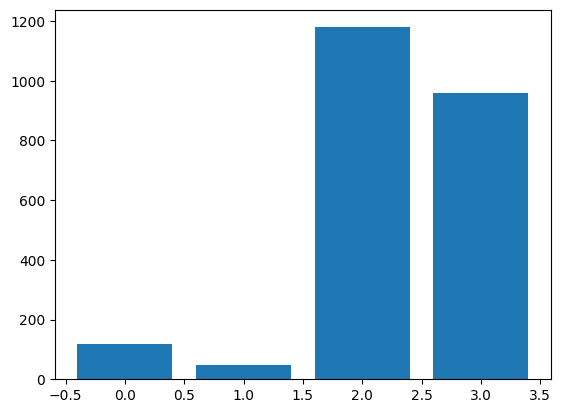

-------------------------------------------------------------------------
FINAL FEATURES
-------------------------------------------------------------------------


array(['PetalLengthCm', 'PetalWidthCm'], dtype=object)

In [34]:
#ANOVA
# Load libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load iris data into a dataframe
iris_dataset = pd.read_csv("Iris.csv")

print('-------------------------------------------------------------------------')
print('ORIGINAL DATASET')
print('-------------------------------------------------------------------------')
iris_dataset.head()

# Create features and target
X = iris_dataset.iloc[:,1:5]
Y = iris_dataset.iloc[:,-1]

print('Before feature selection: shape-',X.shape)
# configure to select all features
fs = SelectKBest(score_func=f_classif, k=2)
X_kbest_features =fs.fit_transform(X, Y)
print('After feature selection: shape-',X_kbest_features.shape)

print('-------------------------------------------------------------------------')
print('ANOVA FEATURES')
print('-------------------------------------------------------------------------')
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature ',i, fs.scores_[i])

# plot the scores
from matplotlib import pyplot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

print('-------------------------------------------------------------------------')
print('FINAL FEATURES')
print('-------------------------------------------------------------------------')
selectedfetures=fs.get_feature_names_out()
selectedfetures

In [35]:
import pandas as pd
from sklearn.feature_selection import SelectKBest,f_classif
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
ftest_selector=SelectKBest(score_func=f_classif,k=2)
x=ftest_selector.fit_transform(x,y)
x[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [25]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
scaler=StandardScaler()
x[:]=scaler.fit_transform(x)
pca=PCA(n_components=2)
x=pca.fit_transform(x)
print(x[:5])

[[-2.81633893  0.50605064]
 [-2.64552745 -0.65179938]
 [-2.87948066 -0.32103586]
 [-2.81093445 -0.57736321]
 [-2.87988351  0.67046764]]


<ipython-input-25-a1c7f7b8febe>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.72054204 -1.69744751 -1.67435299 -1.65125846 -1.62816394 -1.60506942
 -1.58197489 -1.55888037 -1.53578584 -1.51269132 -1.4895968  -1.46650227
 -1.44340775 -1.42031323 -1.3972187  -1.37412418 -1.35102965 -1.32793513
 -1.30484061 -1.28174608 -1.25865156 -1.23555703 -1.21246251 -1.18936799
 -1.16627346 -1.14317894 -1.12008441 -1.09698989 -1.07389537 -1.05080084
 -1.02770632 -1.00461179 -0.98151727 -0.95842275 -0.93532822 -0.9122337
 -0.88913917 -0.86604465 -0.84295013 -0.8198556  -0.79676108 -0.77366655
 -0.75057203 -0.72747751 -0.70438298 -0.68128846 -0.65819393 -0.63509941
 -0.61200489 -0.58891036 -0.56581584 -0.54272131 -0.51962679 -0.49653227
 -0.47343774 -0.45034322 -0.42724869 -0.40415417 -0.38105965 -0.35796512
 -0.3348706  -0.31177607 -0.28868155 -0.26558703 -0.2424925  -0.21939798
 -0.19630345 -0.17320893 -0.15011441 -0.12701

In [23]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import pandas as pd
df=pd.read_csv("Iris.csv")
x=df.drop("Species",axis=1)
y=df["Species"]
scaler=StandardScaler()
x[:]=scaler.fit_transform(x)
lda=LDA(n_components=2)
x=lda.fit_transform(x,y)
x[:5]

<ipython-input-23-af6731eca9bb>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.72054204 -1.69744751 -1.67435299 -1.65125846 -1.62816394 -1.60506942
 -1.58197489 -1.55888037 -1.53578584 -1.51269132 -1.4895968  -1.46650227
 -1.44340775 -1.42031323 -1.3972187  -1.37412418 -1.35102965 -1.32793513
 -1.30484061 -1.28174608 -1.25865156 -1.23555703 -1.21246251 -1.18936799
 -1.16627346 -1.14317894 -1.12008441 -1.09698989 -1.07389537 -1.05080084
 -1.02770632 -1.00461179 -0.98151727 -0.95842275 -0.93532822 -0.9122337
 -0.88913917 -0.86604465 -0.84295013 -0.8198556  -0.79676108 -0.77366655
 -0.75057203 -0.72747751 -0.70438298 -0.68128846 -0.65819393 -0.63509941
 -0.61200489 -0.58891036 -0.56581584 -0.54272131 -0.51962679 -0.49653227
 -0.47343774 -0.45034322 -0.42724869 -0.40415417 -0.38105965 -0.35796512
 -0.3348706  -0.31177607 -0.28868155 -0.26558703 -0.2424925  -0.21939798
 -0.19630345 -0.17320893 -0.15011441 -0.12701

array([[-10.03676332,  -0.45133024],
       [ -9.17292994,  -1.47723373],
       [ -9.48098912,  -0.97969256],
       [ -8.81811924,  -1.4086022 ],
       [ -9.96020031,  -0.11254639]])

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
import pandas as pd
df = pd.read_csv("delivery.csv")
df.head()
x=df.drop("delTime",axis=1)
y=df["delTime"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_pred,y_test)

0.8672262850582052

In [15]:
#Linear Regression
#Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Select features (independent variables) and target (dependent variable)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]  # Features
y = df['PetalLengthCm']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Display the model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 0.12991981605759947
R-squared (R2): 0.9603587427485161
Model Coefficients: [ 0.72417306 -0.641963    1.46632204]
Intercept: -0.2504659324864602


In [16]:
#Logistic Regression
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Prepare features (independent variables) and target (dependent variable)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Features
y = df['Species']  # Target (categorical)

# Encode the target variable (Species) into numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
df = pd.read_csv("chd_data.csv")
df.head()
x=df.drop("chd",axis=1)
y=df["chd"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f"accuracy score {accuracy_score(y_pred,y_test)}")
print(f"confusion matrix {confusion_matrix(y_pred,y_test)}")

accuracy score 0.7
confusion matrix [[9 4]
 [2 5]]


In [19]:
#OR GATE
import numpy as np
# Define the dataset for the OR problem
# Inputs: X = [x1, x2]
# Outputs: y = [0, 1, 1, 1]

X=np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

y=np.array([0, 1, 1, 1])
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add( Dense(units=1,input_dim=2,activation='sigmoid') )
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# Train the model
model.fit(X,y,epochs=1000,verbose=0)
# Evaluate the model
loss,accuracy=model.evaluate(X,y)
print(f"Model accuracy:{accuracy*100:.2f}%")
# Make predictions
predictions=model.predict(X)

# Convert output probabilities to 0 or 1
predictions=(predictions>0.5).astype(int)
print("Predictions:")
print(predictions)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7500 - loss: 0.3898
Model accuracy:75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predictions:
[[1]
 [1]
 [1]
 [1]]


In [22]:
#LOGICAL XOR

import numpy as np
# Define the dataset for the OR problem
# Inputs: X = [x1, x2]
# Outputs: y = [0, 1, 1, 0]

X=np.array([[0, 0],[1, 0],[0, 1],[1, 1]])

y=np.array([0, 1, 1, 0])
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add( Dense(units=2,input_dim=2,activation='relu') )
model.add( Dense(units=1,activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=100,verbose=0)
# Evaluate the model
loss,accuracy=model.evaluate(X,y)
print(f"Model accuracy:{accuracy*100:.2f}%")
# Make predictions
predictions=model.predict(X)

# Convert output probabilities to 0 or 1
predictions=(predictions>0.5).astype(int)
print("Predictions:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.2500 - loss: 0.7797
Model accuracy:25.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predictions:
[[1]
 [0]
 [0]
 [0]]


In [21]:
#NN CLASSIFIER
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X_train_full, y_train_full)

X_valid, X_train = X_valid[::] / 255.0, X_train[::] / 255.0
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
#let’s build the neural network! Here is a classification MLP with two hidden layers:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid),verbose=0)

X_test = X_test[::] / 255.0
model.evaluate(X_test, y_test)
X_new = X_test[:3]/255.0
y_pred = model.predict(X_new)
y_pred


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.13203976, 0.01806263, 0.05455041, 0.10108691, 0.01027293,
        0.36501834, 0.13710801, 0.14767657, 0.02428726, 0.00989715],
       [0.14368519, 0.01831526, 0.06149242, 0.1040332 , 0.01110568,
        0.3416345 , 0.14794247, 0.13764596, 0.02461373, 0.0095315 ],
       [0.14392427, 0.01941995, 0.0571515 , 0.10734607, 0.01059859,
        0.3448013 , 0.1399051 , 0.14266859, 0.02459137, 0.00959336]],
      dtype=float32)

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_customers.csv')

# Select relevant features (assumed columns in the dataset)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN labels to the original dataset for easy view
data['DBSCAN_Labels'] = labels

# Print the dataset with the DBSCAN cluster labels
print(data[['CustomerID', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)', 'DBSCAN_Labels']])

# Optional: Save the output with DBSCAN labels to a CSV file
data.to_csv('Mall_Customers_with_DBSCAN_Labels.csv', index=False)


     CustomerID  Gender  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male                  15                      39   
1             2    Male                  15                      81   
2             3  Female                  16                       6   
3             4  Female                  16                      77   
4             5  Female                  17                      40   
..          ...     ...                 ...                     ...   
195         196  Female                 120                      79   
196         197  Female                 126                      28   
197         198    Male                 126                      74   
198         199    Male                 137                      18   
199         200    Male                 137                      83   

     DBSCAN_Labels  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  


In [ ]:
'''Random forest . done
Decision trees.. done
Adaboost. print done
K means cluster . print
Agglomerative. print
Dbscan . print
Bagging print
SVM. done
KNN. done
Naive Bayes. print'''

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



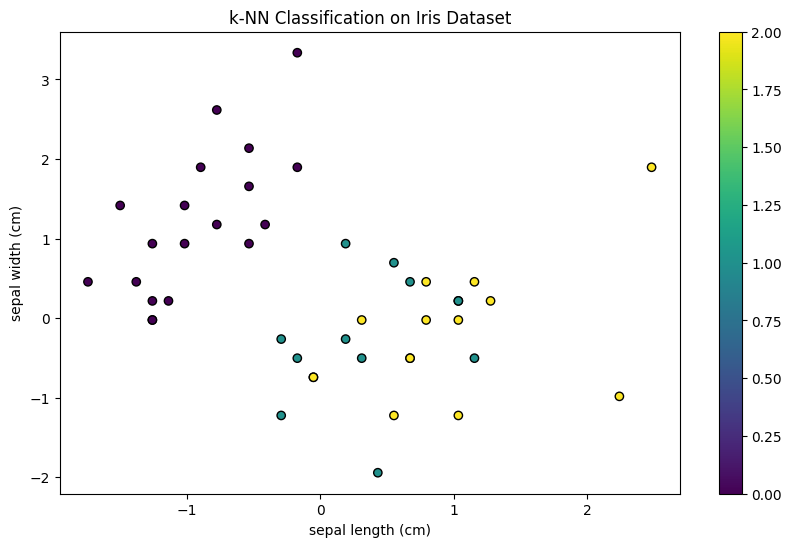

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better visualization (optional)
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a k-NN classifier
k = 3  # You can change the value of k
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize the results (for 2D feature space)
import matplotlib.pyplot as plt

# Plotting the first two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')
plt.title('k-NN Classification on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(scatter)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('spambase.csv')
display(df.head())
predictors = df.iloc[:, 0:57]
target = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print("\nTest 1 with parameters n_estimators=50, random_state=42, algorithm='SAMME'\n")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
train_score = ada_clf.score(X_train, y_train)
print(f"Training Score: {train_score:.4f}")
test_score = ada_clf.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")

ada_clf2 = AdaBoostClassifier(n_estimators=20, random_state=42, algorithm='SAMME')
print("\nTest 2 with parameters n_estimators=20, random_state=42, algorithm='SAMME'\n")
ada_clf2.fit(X_train, y_train)
y_pred = ada_clf2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
train_score = ada_clf2.score(X_train, y_train)
print(train_score)
test_score = ada_clf2.score(X_test, y_test)
print(f"Testing Score: {test_score:.4f}")

print("Classification Report for ada_clf (n_estimators=50):")
print(classification_report(y_test, y_pred))

print("\nClassification Report for ada_clf2 (n_estimators=20):")
print(classification_report(y_test, y_pred))

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_req_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1



Test 1 with parameters n_estimators=50, random_state=42, algorithm='SAMME'

Accuracy: 92.62%
Training Score: 0.9342
Testing Score: 0.9262

Test 2 with parameters n_estimators=20, random_state=42, algorithm='SAMME'

Accuracy: 0.9087947882736156
0.910054347826087
Testing Score: 0.9088
Classification Report for ada_clf (n_estimators=50):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921


Classification Report for ada_clf2 (n_estimators=20):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       531
           1       0.90      0.88      0.89       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted

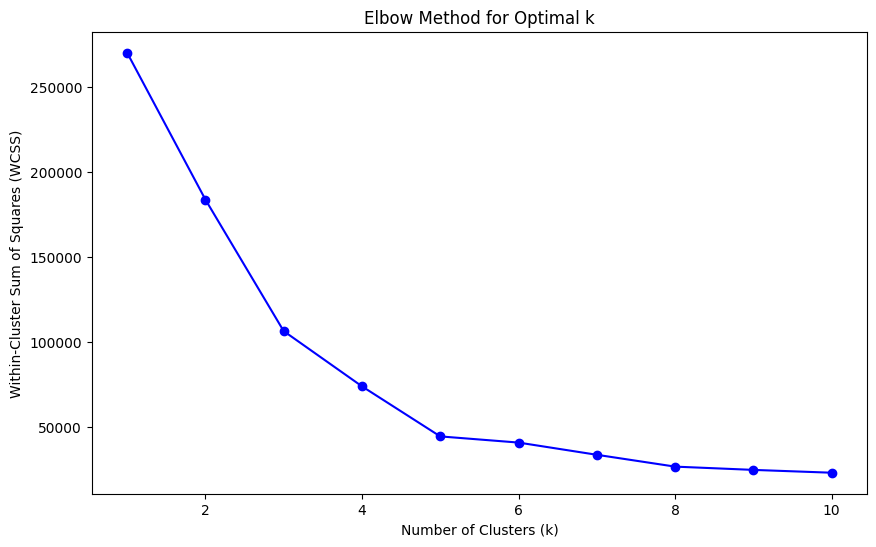

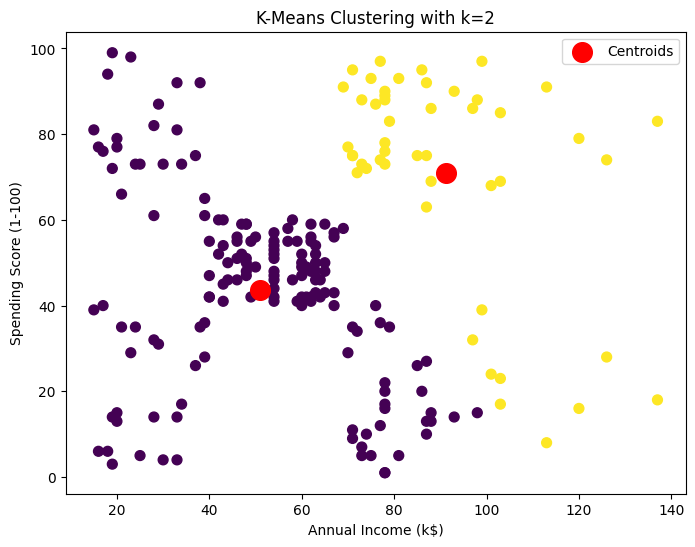

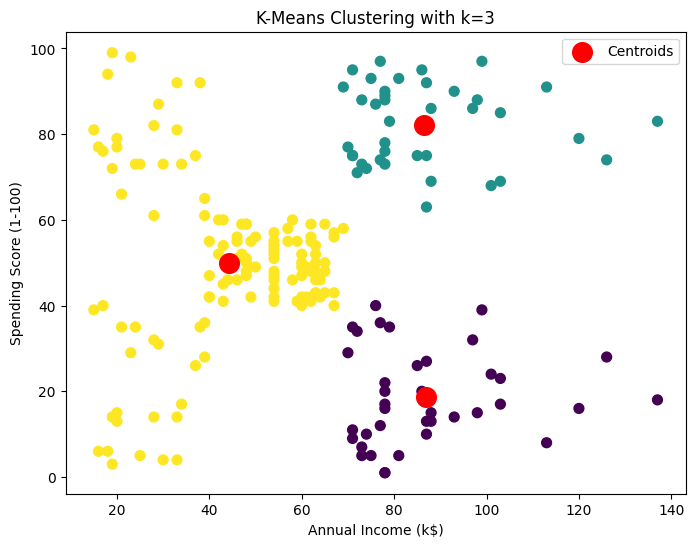

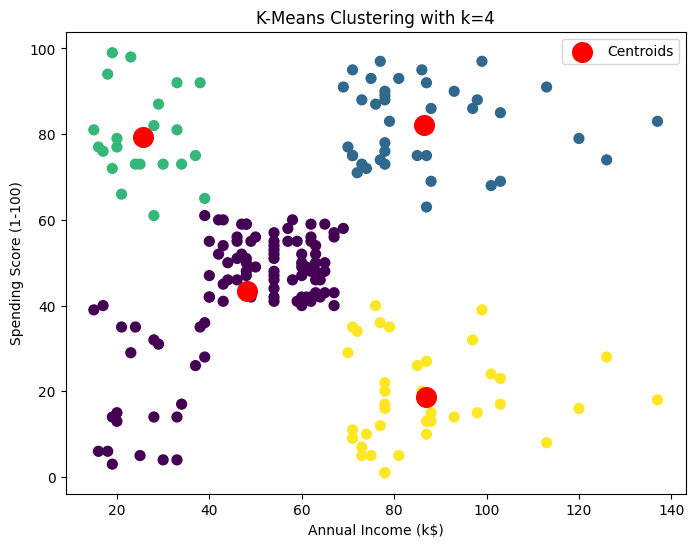

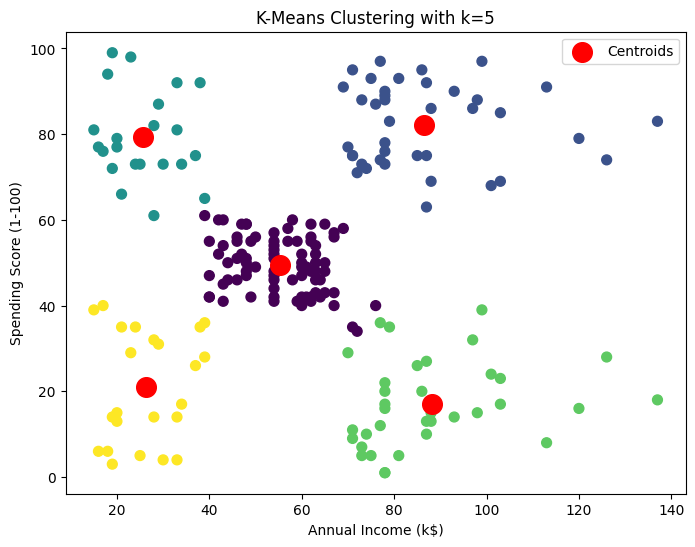

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("Mall_customers.csv")

# Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 1: Using the elbow method to find the optimal number of clusters
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 2: Define function to plot KMeans clusters for a given k
def plot_kmeans_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    # Plotting the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'K-Means Clustering with k={k}')
    plt.legend()
    plt.show()

# Step 3: Visualize clusters for k = 2, 3, 4, and 5
for k in [2, 3, 4, 5]:
    plot_kmeans_clusters(k)


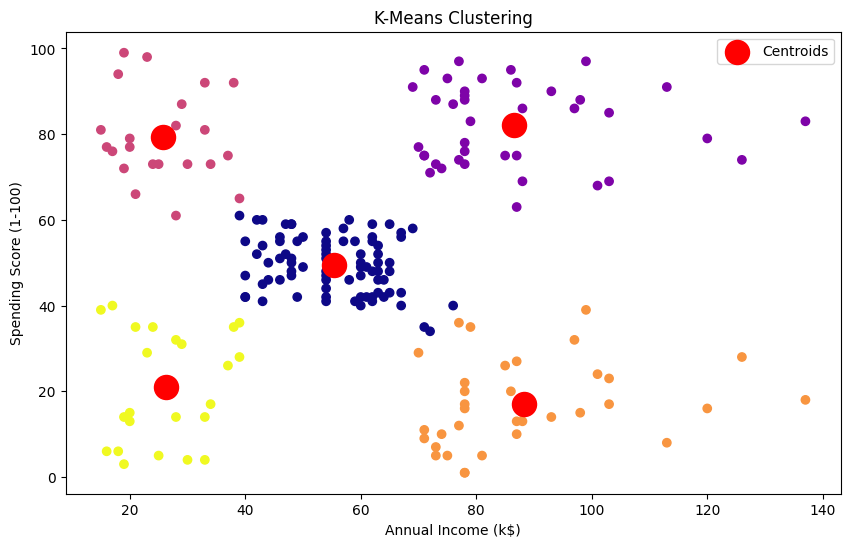

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='plasma', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
